## Hierarchical Topic Models and the Nested Chinese Restaurant Process

### I. Background

Recently, complex probabilistic models are increasingly prevalent in various of domains. However, there are several challenges that should be dealt with due to their open-ended nature. That is, the data sets often grow over time, as they growing, they bring new entities and new structures to the fore. Take the problem of learning a topic hierarchy from data for example. Given a collection of __*documents*__, each of which contains a set of __*words*__ and the goal is to discover common usage patterns or __*topics*__ in the documents, and to organize these topics into a hierarchy.

This paper proposes a new method that specified a generative probabilistic model for hierarchical structures and adopt Bayesian perspective to learn such structures from data. The hierarchies in this case could be considered as random variables and specified procedurally. In addition, the underlying approach of constructing the probabilistic object is __Chinese restaurant process (CRP)__, a distribution on partitions of integers. In this paper, they extend CRP to a hierarchy of partitions, known as __nested Chinese restaruant process (nCRP)__, and apply it as a representation of prior and posterior distributions for topic hierarchies. To be more specific, each node in the hierarchy is associated with a topic, where a topic is a distribution across words. A document is generated by choosing a path from the root to a leaf, repeatedly sampling topics along that path, and sampling the words from the selected topics. Thus the orga- nization of topics into a hierarchy aims to capture the breadth of usage of topics across the corpus, reflecting underlying syntactic and semantic notions of generality and specificity.

### II. Algorithm Description

#### A. Chinese Restaurant Process

CRP is an analogous to seating customers at tables in a Chinese restaurant. Imagine there is a Chinese restaurant with an infinite number of circular tables, each with infinite capacity. Customer 1 sits at the first table. The next customer either sits at the same table as customer 1, or the next table. The $m$th subsequent customer sits at a table drawn from the following distribution:

$$p(\text{occupied table } i \text{ | previous customers}) =  \frac{m_i}{\gamma+m-1}$$


$$p(\text{next unoccupied table | previous customers}) = \frac{\gamma}{\gamma + m -1}$$

where $m_i$ is the number of previous customers at table $i$, and $\gamma$ is a parameter. After $M$
customers sit down, the seating plan gives a partition of $M$ items. This distribution gives
the same partition structure as draws from a Dirichlet process.

#### B. Nested Chinese Restaurant Process

A nested Chinese restaurant process (nCRP) is an extended version of CRP. Suppose that there are an infinite number of infinite-table Chinese restaurants in a city. A restaurant is determined to be the root restaurant and on each of its infinite tables is a card with the name of another restaurant. On each of the tables in those restaurants are cards that refer to other restaurants, and this structure repeats infinitely. Each restaurant is referred to exactly once.  As a result, the whole process could be imagined as an infinitely-branched tree.

Now, consider a tourist arrives in the city for a culinary vacation. On the first first day, he select a root Chinese restaurant and selects a table from the equation above. On the second day, he enters to the restaurant refered by previous restaurant , again from the above equation. This process was repeated for $L$ days, and at the end, the tourist has sat at L restaurants which constitute a path from the root to a restaurant at the $L$th level in the infinite tree. After M tourists take L-day vacations, the collection of paths describe a particular L-level subtree of the infinite tree.

#### C. Hierarchical Topic Model (hLDA)

The hierarchical latent Dirichlet allocation model (hLDA) together with nested Chinese restaruant process (nCRP) illustrate the pattern of words from the collection of documents. There are 3 procedures in hLDA: (1) Draw a path from root-node to a leaf; (2) Select a specific path, draw a vector of topic along the path; (3) Draw the words from the topic. In addition, all documents share the topic associated with the root restaurant.

1. Let c1 be the root restaurant.
+ For each level $\ell\in\{2,...,L\}$:
    1. Draw a table from restaurant $c_{\ell-1}$ using CRP. Set $c_{\ell}$ to be the restaurant reffered to by that table.
+ Draw an L-dimensional topic proportion vector $\theta$ from Dir($\alpha$).
+ For each word $n\in\{1,...,N\}$:
    1. Draw $z\in\{1,...,L\}$ from Mult($\theta$).
    + Draw $w_n$ from the topic associated with restaurant $c_z$.

<img src="hLDA.png" style="width:400px">

* Notation:
    * $T$ : L-level infinite-tree - drawn from CRP($\gamma$)
    * $\theta$ : L-dimensional topic propotional distribution - drawn from Dir($\alpha$)
    * $\beta$ : probability of words for each topic - drawn from $\eta$
    * $c_{\ell}$ : L-level paths, given $T$
    * $z$ : actual number of topics for each level - drawn from Mult($\theta$)
    * $w$ : word distribution for each topic at each level
    * $N$ : number of words - $n\in\{1,...,N\}$
    * $M$ : number of documents - $m\in\{1,...,M\}$

### III. Approximate Inference by Gibbs Sampling

Gibbs sampling will sample from the posterior nCRP and corresponding topics in the hLDA model. The sampler are divided into 2 parts -- $z_{m,n}$ and $ c_{m,\ell}$. In addition, variables $\theta$ and $\beta$ are integrated out.

#### A. Notation

* $w_{m,n}$ : the $n$th word in the $m$th documnt
* $c_{m,\ell}$ : the restaurant corresponding to the $\ell$th topic in document $m$
* $z_{m,n}$ : the assignment of the $n$th word in the $m$th document to one of the $L$ available topics

#### B. Topic distribution : $z_{m,n}$

$$p(z_{i}=j\hspace{0.5ex}|\hspace{0.5ex}{\bf z}_{-i},{\bf w})\propto\frac{n_{-i,j}^{(w_{i})}+\beta}{n_{-i,j}^{(\cdot)}+W\beta}\frac{n_{-i,j}^{(d_{i})}+\alpha}{n_{-i,\cdot}^{(d_{i})}+T\alpha}$$

* $z_{i}$ : assignments of words to topics
* $n_{-i,j}^{(w_{i})}$ : number of words assigned to topic $j$ that are the same as $w_i$
* $n_{-i,j}^{(\cdot)}$ : total number of words assigned to topic $j$
* $n_{-i,j}^{(d_{i})}$ : number of words from document $d_i$ assigned to topic $j$
* $n_{-i,\cdot}^{(d_{i})}$ : total number of words in document $d_i$
* $W$ : number of words have been assigned

#### C. Path : ${\bf c}_{m}$

$$p({\bf c}_{m}\hspace{0.5ex}|\hspace{0.5ex}{\bf w}, {\bf c}_{-m}, {\bf z})\propto p({\bf w}_{m}\hspace{0.5ex}|\hspace{0.5ex}{\bf c}, {\bf w}_{-m}, {\bf z})\cdot p({\bf c}_{m}\hspace{0.5ex}|\hspace{0.5ex}{\bf c}_{-m})$$

* $p({\bf c}_{m}\hspace{0.5ex}|\hspace{0.5ex}{\bf w}, {\bf c}_{-m}, {\bf z})$ : posterior of the set of probabilities of possible novel paths
* $p({\bf w}_{m}\hspace{0.5ex}|\hspace{0.5ex}{\bf c}, {\bf w}_{-m}, {\bf z})$ : likelihood of the data given a particular choice of ${\bf c}_{m}$
* $p({\bf c}_{m}\hspace{0.5ex}|\hspace{0.5ex}{\bf c}_{-m})$ : prior on ${\bf c}_{m}$ which implies by the nCRP


$$p({\bf w}_{m}\hspace{0.5ex}|\hspace{0.5ex}{\bf c}, {\bf w}_{-m}, {\bf z})=\prod\limits_{\ell=1}^{L}\left(\frac{\Gamma(n_{c_{m,\ell},-m}^{(\cdot)}+W\eta)}{\prod_{w}\Gamma(n_{c_{m,\ell},-m}^{(w)}+\eta)}\frac{\prod_{w}\Gamma(n_{c_{m,\ell},-m}^{(w)}+n_{c_{m,\ell},m}^{(w)}+\eta)}{\Gamma(n_{c_{m,\ell},-m}^{(\cdot)}+n_{c_{m,\ell},m}^{(\cdot)}+W\eta)}\right)$$

* $p({\bf w}_{m}\hspace{0.5ex}|\hspace{0.5ex}{\bf c}, {\bf w}_{-m}, {\bf z})$ : joint distribution of likelihood
* $n_{c_{m,\ell},-m}^{(w)}$ : number of instances of word $w$ that have been assigned to the topic indexed by $c_{m,\ell}$, not in the document $m$
* $W$ : total vocabulary size

### IV. Implementation

#### A. Package import

In [1]:
import numpy as np
from scipy.special import gammaln
import random
from collections import Counter
import string
import graphviz
import pygraphviz
import pydot

#### B. Function construction

#### B.1 Chinese Restaurant Process (CRP)

In [2]:
def CRP(topic, phi):
    '''
    CRP gives the probability of topic assignment for specific vocabulary
    Return a 1 * j array, where j is the number of topic
    
    Parameter
    ---------
    topic: a list of lists, contains assigned words in each sublist (topic)
    phi: double, parameter for CRP
    
    Return
    ------
    p_crp: the probability of topic assignments for new word
    '''
    p_crp = np.empty(len(topic)+1)
    m = sum([len(x) for x in topic])
    p_crp[0] = phi / (phi + m)
    for i, word in enumerate(topic):
        p_crp[i+1] = len(word) / (phi + m)
    return p_crp

#### B.2 Node Sampling

In [3]:
def node_sampling(corpus_s, phi):
    '''
    Node sampling samples the number of topics, L
    return a j-layer list of lists, where j is the number of topics
    
    Parameter
    ---------
    corpus_s: a list of lists, contains words in each sublist (document)
    phi: double, parameter for CRP
    
    Return
    ------
    topic: a list of lists, contains assigned words in each sublist (topic)
    '''
    topic = []    
    for corpus in corpus_s:
        for word in corpus:
            cm = CRP(topic, phi)
            theta = np.random.multinomial(1, (cm/sum(cm))).argmax()
            if theta == 0:
                topic.append([word])
            else:
                topic[theta-1].append(word)
    return topic

#### B.3 Gibbs sampling -- $z_{m,n}$

In [4]:
def Z(corpus_s, topic, alpha, beta):
    '''
    Z samples from LDA model
    Return two j-layer list of lists, where j is the number of topics
    
    Parameter
    ---------
    corpus_s: a list of lists, contains words in each sublist (document)
    topic: a L-dimensional list of lists, sample from node_sampling
    alpha: double, parameter
    beta: double, parameter
    
    Return
    ------
    z_topic: a j-dimensional list of lists, drawn from L-dimensioanl topic, j<L
    z_doc: a j-dimensioanl list of lists, report from which document the word is assigned to each topic
    '''
    n_vocab = sum([len(x) for x in corpus_s])
    t_zm = np.zeros(n_vocab).astype('int')
    z_topic = [[] for _ in topic]
    z_doc = [[] for _ in topic]
    z_tmp = np.zeros((n_vocab, len(topic)))
    assigned = np.zeros((len(corpus_s), len(topic)))
    n = 0
    for i in range(len(corpus_s)):
        for d in range(len(corpus_s[i])): 
            wi = corpus_s[i][d]   
            for j in range(len(topic)):
                lik = (z_topic[j].count(wi) + beta) / (assigned[i, j] + n_vocab * beta)
                pri = (len(z_topic[j]) + alpha) / ((len(corpus_s[i]) - 1) + len(topic) * alpha)
                z_tmp[n, j] = lik * pri
                t_zm[n] = np.random.multinomial(1, (z_tmp[n,:]/sum(z_tmp[n,:]))).argmax()
            z_topic[t_zm[n]].append(wi)
            z_doc[t_zm[n]].append(i)
            assigned[i, t_zm[n]] += 1
            n += 1
    z_topic = [x for x in z_topic if x != []]
    z_doc = [x for x in z_doc if x != []]
    return z_topic, z_doc

#### B.4 Gibbs sampling -- ${\bf c}_{m}$, CRP prior

In [5]:
def CRP_prior(corpus_s, doc, phi):
    '''
    CRP_prior implies by nCRP
    Return a m*j array, whre m is the number of documents and j is the number of topics
    
    Parameter
    ---------
    corpus_s: a list of lists, contains words in each sublist (document)
    doc: a j-dimensioanl list of lists, drawn from Z function (z_doc)
    phi: double, parameter for CRP
    
    Return
    ------
    c_p: a m*j array, for each document the probability of the topics
    '''
    c_p = np.empty((len(corpus_s), len(doc)))
    for i, corpus in enumerate(corpus_s):
        p_topic = [[x for x in doc[j] if x != i] for j in range(len(doc))]
        tmp = CRP(p_topic, phi)
        c_p[i,:] = tmp[1:]
    return c_p

#### B.5 Gibbs sampling -- ${\bf c}_{m}$, likelihood

In [6]:
def likelihood(corpus_s, topic, eta):
    '''
    likelihood gives the propability of data given a particular choice of c
    Return a m*j array, whre m is the number of documents and j is the number of topics
    
    Parameter
    ---------
    corpus_s: a list of lists, contains words in each sublist (document)
    topic: a j-dimensional list of lists, drawn from Z function (z_assigned)
    eta: double, parameter
    
    Return
    ------
    w_m: a m*j array
    '''
    w_m = np.empty((len(corpus_s), len(topic)))
    allword_topic = [word  for t in topic for word in t]
    n_vocab = sum([len(x) for x in corpus_s])
    for i, corpus in enumerate(corpus_s):
        prob_result = []
        for j in range(len(topic)):
            current_topic = topic[j]
            n_word_topic = len(current_topic)
            prev_dominator = 1
            later_numerator = 1
            prob_word = 1  

            overlap = [val for val in set(corpus) if val in current_topic]
            
            prev_numerator = gammaln(len(current_topic) - len(overlap) + n_vocab * eta)
            later_dominator = gammaln(len(current_topic) + n_vocab * eta)
            for word in corpus:                
                corpus_list = corpus                
                if current_topic.count(word) - corpus_list.count(word) < 0 :
                    a = 0
                else:
                    a = current_topic.count(word) - corpus_list.count(word)
                
                prev_dominator += gammaln(a + eta)
                later_numerator += gammaln(current_topic.count(word) + eta)
           
            prev = prev_numerator - prev_dominator
            later = later_numerator - later_dominator
            
            like = prev + later 
            w_m[i, j] = like
        w_m[i, :] = w_m[i, :] + abs(min(w_m[i, :]))
    w_m = w_m/w_m.sum(axis = 1)[:, np.newaxis]
    return w_m

#### B.6 Gibbs sampling -- ${\bf c}_{m}$, posterior

In [7]:
def post(w_m, c_p):
    '''
    Parameter
    ---------
    w_m: likelihood, drawn from likelihood function
    c_p: prior, drawn from CRP_prior function
    
    Return
    ------
    c_m, a m*j list of lists
    '''
    c_m = (w_m * c_p) / (w_m * c_p).sum(axis = 1)[:, np.newaxis]
    return np.array(c_m)

#### B.7 Gibbs sampling -- $w_{n}$

In [8]:
def wn(c_m, corpus_s):
    '''
    wn return the assignment of words for topics, drawn from multinomial distribution
    Return a n*1 array, where n is the total number of word
    
    Parameter
    ---------
    c_m: a m*j list of lists, drawn from post function
    corpus_s: a list of lists, contains words in each sublist (document)
    
    Return
    ------
    wn_ass: a n*1 array, report the topic assignment for each word
    '''
    wn_ass = []
    for i, corpus in enumerate(corpus_s):
        for word in corpus:
            theta = np.random.multinomial(1, c_m[i]).argmax()
            wn_ass.append(theta)
    return np.array(wn_ass)

#### C. Gibbs sampling

#### C.1 Find most common value

In [9]:
most_common = lambda x: Counter(x).most_common(1)[0][0]

#### C.2 Gibbs sampling

In [10]:
def gibbs(corpus_s, topic, alpha, beta, phi, eta, ite):
    '''
    gibbs will return the distribution of words for topics
    Return a j-dimensional list of lists, where j is the number of topics
    
    Parameter
    ---------
    corpus_s: a list of lists, contains words in each sublist (document)
    topic: a j-dimensional list of lists, drawn from Z function (z_assigned)
    alpha: double, parameter for Z function
    beta: double, parameter for Z function
    phi: double, parameter fro CRP_prior function
    eta: double, parameter for w_n function
    ite: int, number of iteration
    
    Return
    ------
    wn_topic: a j-dimensional list of lists, the distribution of words for topics
    '''
    n_vocab = sum([len(x) for x in corpus_s])
    gibbs = np.empty((n_vocab, ite)).astype('int')
   
    for i in range(ite):
        z_topic, z_doc = Z(corpus_s, topic, alpha, beta)
        c_p = CRP_prior(corpus_s, z_doc, phi)
        w_m = likelihood(corpus_s, z_topic, eta)
        c_m = post(w_m, c_p)
        gibbs[:, i] = wn(c_m, corpus_s) 
    # drop first 1/10 data
    gibbs = gibbs[:, int(ite/10):]
    theta = [most_common(gibbs[x]) for x in range(n_vocab)]
    
    n_topic = max(theta)+1
    
    wn_topic = [[] for _ in range(n_topic)]
    wn_doc_topic = [[] for _ in range(n_topic)]

    doc = 0
    n = 0
    for i, corpus_s in enumerate(corpus_s):
        if doc == i:
            for word in corpus_s:
                wn_doc_topic[theta[n]].append(word)
                n += 1
            for j in range(n_topic):
                if wn_doc_topic[j] != []:
                    wn_topic[j].append(wn_doc_topic[j])
        wn_doc_topic = [[] for _ in range(n_topic)]        
        doc += 1
    wn_topic = [x for x in wn_topic if x != []]
    return wn_topic

### V. Topic Modeling with hLDA

Gibbs sampling in section __`IV`__ distributes the input __*vocabularies*__ from __*documents*__ in __*corpus*__ to available __*topics*__, which sampled from $L$-dimensional topics. In section __`V`__, an $n$-level tree will be presented by tree plot, which the root-node will be more general and the leaves will be more specific. In addition, tree plot will return the words sorted by their frequencies for each node.

#### A. hLDA model

In [11]:
def hLDA(corpus_s, alpha, beta, phi, eta, ite, level):
    '''
    hLDA generates an n*1 list of lists, where n is the number of level
    
    Parameter
    ---------
    corpus_s: a list of lists, contains words in each sublist (document)
    alpha: double, parameter for Z function
    beta: double, parameter for Z function
    phi: double, parameter fro CRP_prior function
    eta: double, parameter for w_n function
    ite: int, number of iteration
    level: int, number of level
    
    Return
    hLDA_tree: an n*1 list of lists, each sublist represents a level, the sublist in each level represents a topic
    node: an n*1 list of lists, returns how many nodes there are in each level
    '''
    
    topic = node_sampling(corpus_s, phi)
    print(len(topic))
    
    hLDA_tree = [[] for _ in range(level)]
    tmp_tree = []
    node = [[] for _ in range(level+1)]
    node[0].append(1)
    
    for i in range(level):
        if i == 0:
            wn_topic = gibbs(corpus_s, topic, alpha, beta, phi, eta, ite)
            node_topic = [x for word in wn_topic[0] for x in word]
            hLDA_tree[0].append(node_topic)
            tmp_tree.append(wn_topic[1:])
            tmp_tree = tmp_tree[0]
            node[1].append(len(wn_topic[1:]))
        else:
            for j in range(sum(node[i])):
                if tmp_tree == []:
                    break
                wn_topic = gibbs(tmp_tree[0], topic, alpha, beta, phi, eta, ite)
                node_topic = [x for word in wn_topic[0] for x in word]
                hLDA_tree[i].append(node_topic)
                tmp_tree.remove(tmp_tree[0])
                if wn_topic[1:] != []:
                    tmp_tree.extend(wn_topic[1:])
                node[i+1].append(len(wn_topic[1:]))
        
    return hLDA_tree, node[:level]

#### B. hLDA plot

In [12]:
def HLDA_plot(hLDA_object, Len = 8, save = False):
    
    from IPython.display import Image, display
    def viewPydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)

    words = hLDA_object[0]
    struc = hLDA_object[1]
      
    graph = pydot.Dot(graph_type='graph')
    end_index = [np.insert(np.cumsum(i),0,0) for i in struc]
    
    for level in range(len(struc)-1):
        leaf_level = level + 1
        leaf_word = words[leaf_level]
        leaf_struc = struc[leaf_level]
        word = words[level]
        end_leaf_index = end_index[leaf_level]

        for len_root in range(len(word)):
            root_word = '\n'.join([x[0] for x in Counter(word[len_root]).most_common(Len)])
            leaf_index = leaf_struc[len_root]  
            start = end_leaf_index[len_root]
            end = end_leaf_index[len_root+1]
            lf = leaf_word[start:end]  
            for l in lf:
                leaf_w = '\n'.join([x[0] for x in Counter(list(l)).most_common(Len)])
                edge = pydot.Edge(root_word, leaf_w)
                graph.add_edge(edge)
    if save == True:
        graph.write_png('graph.png')
    viewPydot(graph)

### VI. Empirical Example

#### A. Simulated data

For simulated data example, each document, $d$, in corpus is generated by normal distribution with different size of words, $w_{d,n}$, where $n\in\{10,...,200\}$ and ${\bf w}_{d}\sim N(0, 1)$. In this example, by generating 20 documents in the corpus, we are able to see the simulated tree with the number near mean, $0$, such as `{w0, w1, w-1}` in the root node and the number far from mean such as `{w10, w-10, w15}` in the leaves.

In [13]:
def sim_corpus(n):
    n_rows = n
    corpus = [[] for _ in range(n_rows)]
    for i in range(n_rows):
        n_cols = np.random.randint(10, 200, 1, dtype = 'int')[0]
        for j in range(n_cols):
            num = np.random.normal(0, 1, n_cols)
            word = 'w%s' % int(round(num[j], 1)*10)
            corpus[i].append(word)
    return corpus

In [14]:
corpus_0 = sim_corpus(35)

In [15]:
tree_0 = hLDA(corpus_0, 0.1, 0.01, 2, 0.01, 100, 3)

13


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in true_divide


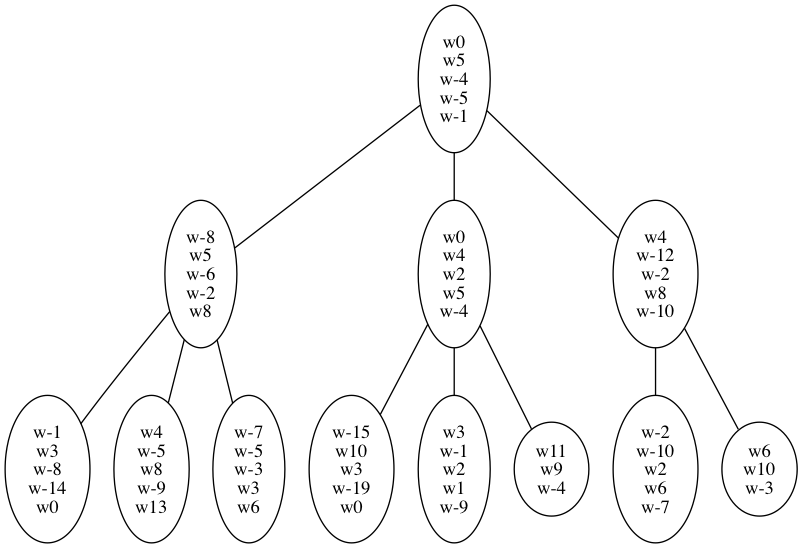

In [16]:
HLDA_plot(tree_0, 5, False)

#### B. Real data

For real data example, the corpus of documents is generated from [Blei's sample data](https://github.com/blei-lab/lda-c). The documents are splitted by paragraph; that is, each paragraph reprents one document. We take first 11 documents to form the sample corpus used in the hLDA model. To form the corpus, we read the corpus as a large list of lists. The sublists in the nested list represent the documents; the elements in each sublist represent the words in specific document. Note that the punctuations are removed from the corpus.

In [17]:
def read_corpus(document_path):
    punc = ['`', ',', "'", '.', '!', '?']
    corpus = []
    with open(document_path, 'r') as f:
        for line in f:
            for x in punc:
                line = line.replace(x, '')
            line = line.strip('\n')
            word = line.split(' ')
            corpus.append(word)
    return(corpus)

In [18]:
corpus_1 = read_corpus('sample.txt')

In [19]:
tree_1 = hLDA(corpus_1, 0.1, 0.01, 1, 0.01, 100, 3)

6


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in true_divide


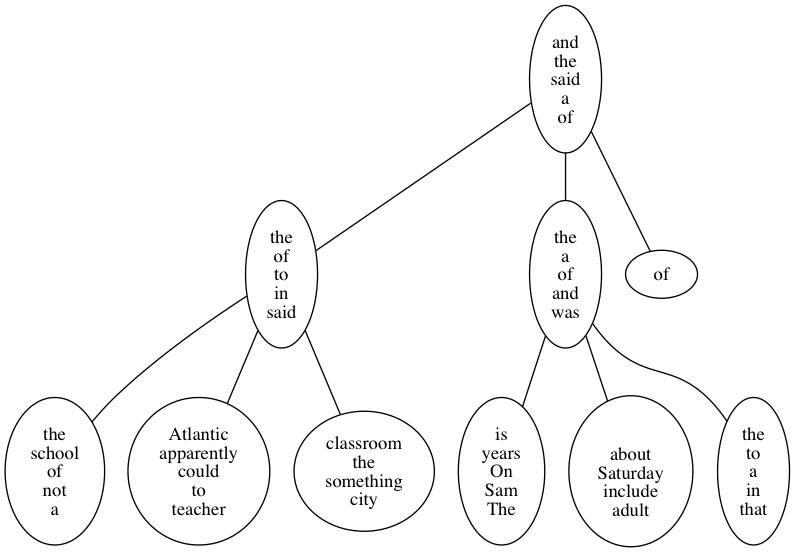

In [20]:
HLDA_plot(tree_1, 5, False)

### VII. Optimization

In [12]:
%load_ext Cython

In [ ]:
%%cython -a

cimport cython
import numpy as np

@cython.cdivision
@cython.boundscheck(False)
@cython.wraparound(False)